In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 17 15:43:55 2025

@author: dnd2129
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('Course Data Merged.csv')

#unique courses
len(set(df['Class_Name (SIS)'])) #628 unique courses.


628

In [11]:
#corr matrix too large so im only gonna take top 20 courses
top_20_courses = df['Class_Name (SIS)'].value_counts().nlargest(20).index
df = df[df['Class_Name (SIS)'].isin(top_20_courses)]
np.shape(df)

(55677, 31)

In [12]:
# Get  random sample of students
unique_students = df['UNI'].unique()
np.random.seed(42) #im setting this seed here so we get same sample here on out.
sampled_students = np.random.choice(unique_students, size=250, replace=False)
sampled_df = df[df['UNI'].isin(sampled_students)]

sampled_df.head()
np.shape(sampled_df)

(1792, 31)

In [13]:
# Step 1: Create a binary matrix — rows = students, columns = courses
binary_matrix = sampled_df.pivot_table(
    index='UNI',
    columns='Class_Name (SIS)',
    aggfunc=lambda x: 1,  # mark 1 if the student took the course
    fill_value=0
)
binary_matrix.head()

Combined Black Flag                         \
Class_Name (SIS) Advanced Corporate Financ CROSS CULTURAL SEMINAR   
UNI                                                                 
aah2220                                  0                      0   
aap2188                                  1                      0   
ab4978                                   1                      0   
ac5342                                   0                      0   
acb2250                                  0                      0   

                                                                      \
Class_Name (SIS) Capital Markets & Investm ECONOMICS OF STRATEGIC BE   
UNI                                                                    
aah2220                                  1                         0   
aap2188                                  1                         1   
ab4978                                   1                         1   
ac5342                                   1                         0   
acb2250                                  1                         0   

                                                                      \
Class_Name (SIS) Financial Planning & Anal Financial Statement Analy   
UNI                                                                    
aah2220                                  0                         0   
aap2188                                  1                         0   
ab4978                                   1                         0   
ac5342                                   0                         1   
acb2250                                  0                         0   

                                                              \
Class_Name (SIS) Foundations of VC GLOBAL ECONOMIC ENVIRONME   
UNI                                                            
aah2220                          0                         0   
aap2188                          0                         1   
ab4978                           1                         1   
ac5342                           0                         0   
acb2250                          0                         1   

                                                                      ...  \
Class_Name (SIS) Independent Study - 1.5 c Independent Study - 3 cre  ...   
UNI                                                                   ...   
aah2220                                  0                         0  ...   
aap2188                                  1                         0  ...   
ab4978                                   1                         0  ...   
ac5342                                   0                         0  ...   
acb2250                                  1                         0  ...   

                    billing_program_school                       \
Class_Name (SIS) Introduction to Programmi MANAGERIAL ECONOMICS   
UNI                                                               
aah2220                                  0                    0   
aap2188                                  1                    1   
ab4978                                   1                    1   
ac5342                                   0                    0   
acb2250                                  1                    1   

                                                                 \
Class_Name (SIS) MANAGERIAL NEGOTIATIONS MERGERS & ACQUISITIONS   
UNI                                                               
aah2220                                1                      0   
aap2188                                1                      0   
ab4978                                 1                      0   
ac5342                                 1                      1   
acb2250                                0                      0   

                                                            \
Class_Name (SIS) Operations Strategy Organizationa

In [14]:
# Step 2: Compute the correlation (or co-occurrence) matrix
course_corr = binary_matrix.corr()
course_corr.head()

Combined Black Flag  \
Class_Name (SIS)                              Advanced Corporate Financ   
                    Class_Name (SIS)                                      
Combined Black Flag Advanced Corporate Financ                  1.000000   
                    CROSS CULTURAL SEMINAR                     0.140563   
                    Capital Markets & Investm                  0.104077   
                    ECONOMICS OF STRATEGIC BE                 -0.046719   
                    Financial Planning & Anal                  0.145161   

                                                                      \
Class_Name (SIS)                              CROSS CULTURAL SEMINAR   
                    Class_Name (SIS)                                   
Combined Black Flag Advanced Corporate Financ               0.140563   
                    CROSS CULTURAL SEMINAR                  1.000000   
                    Capital Markets & Investm              -0.150372   
                    ECONOMICS OF STRATEGIC BE               0.017497   
                    Financial Planning & Anal              -0.014939   

                                                                         \
Class_Name (SIS)                              Capital Markets & Investm   
                    Class_Name (SIS)                                      
Combined Black Flag Advanced Corporate Financ                  0.104077   
                    CROSS CULTURAL SEMINAR                    -0.150372   
                    Capital Markets & Investm                  1.000000   
                    ECONOMICS OF STRATEGIC BE                 -0.064799   
                    Financial Planning & Anal                  0.012258   

                                                                         \
Class_Name (SIS)                              ECONOMICS OF STRATEGIC BE   
                    Class_Name (SIS)                                      
Combined Black Flag Advanced Corporate Financ                 -0.046719   
                    CROSS CULTURAL SEMINAR                     0.017497   
                    Capital Markets & Investm                 -0.064799   
                    ECONOMICS OF STRATEGIC BE                  1.000000   
                    Financial Planning & Anal                  0.027112   

                                                                         \
Class_Name (SIS)                              Financial Planning & Anal   
                    Class_Name (SIS)                                      
Combined Black Flag Advanced Corporate Financ                  0.145161   
                    CROSS CULTURAL SEMINAR                    -0.014939   
                    Capital Markets & Investm                  0.012258   
                    ECONOMICS OF STRATEGIC BE                  0.027112   
                    Financial Planning & Anal                  1.000000   

                                                                         \
Class_Name (SIS)                              Financial Statement Analy   
                    Class_Name (SIS)                                      
Combined Black Flag Advanced Corporate Financ                  0.142179   
                    CROSS CULTURAL SEMINAR                    -0.010262   
                    Capital Markets & Investm                  0.096482   
                    ECONOMICS OF STRATEGIC BE                 -0.052828   
                    Financial Planning & Anal                  0.108028   

                                                                 \
Class_Name (SIS)                              Foundations of VC   
                    Class_Name (SIS)                              
Combined Black Flag Advanced Corporate Financ         -0.025637   
                    CROSS CULTURAL SEMINAR            -0.019960   
                    Capital Markets & Investm          0.175521   
                    ECONOMICS OF STRATEGIC BE         -0.044286   
 

In [15]:
course_corr.to_csv('random sample (all courses) course_corr.csv')

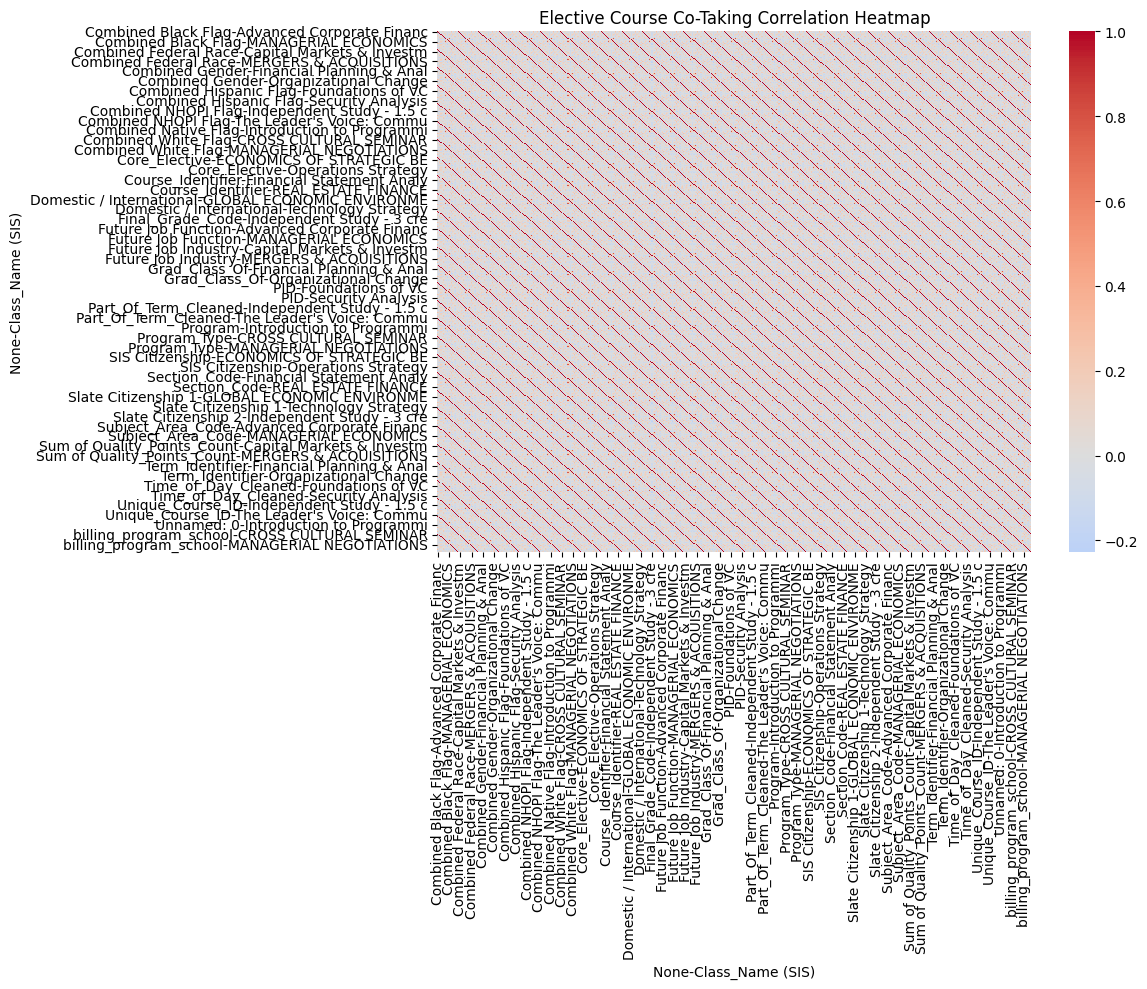

In [16]:
# Step 3: Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(course_corr, cmap='coolwarm', center=0, annot=False)
plt.title("Elective Course Co-Taking Correlation Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()